In [51]:
import pandas as pd
import numpy as np


training = pd.read_csv("training.csv", encoding='cp1252')

test = pd.read_csv("test.csv", encoding='cp1252')


training.head()
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6662 entries, 0 to 6661
Data columns (total 37 columns):
OBS_ID                   6662 non-null int64
KANAL                    6662 non-null object
SHOW_ID                  6662 non-null int64
SHOW_DATUM               6662 non-null object
FAKTOR                   6662 non-null object
WORDING_ID               6662 non-null int64
BRAND_FLG                6662 non-null int64
BRAND_ID                 4414 non-null float64
WDHL_FLG                 6662 non-null int64
BESTELL_ID               6662 non-null int64
ARTIKEL_ID               6662 non-null int64
SHOW_POSITION            6662 non-null int64
NEW_ITEM_FLG             6662 non-null int64
AIRING_23_FLG            6662 non-null int64
AIRING_456_FLG           6662 non-null int64
ADT_FLG                  6662 non-null int64
WG_ID                    6662 non-null int64
WGH1_ID                  6662 non-null int64
WGH3_ID                  6662 non-null int64
WGH4_ID                  6662 non

In [52]:


frames = [test, training]
result = pd.concat(frames)
len(result) - len(training)



1003

In [53]:
result.drop(['DIVISION_DESC_SORT','WGH4_DESC'],axis=1,inplace=True)

In [54]:
result["FAKTOR"] = result["FAKTOR"].str.replace(',', ".").astype(float)

In [55]:
result["KANAL"] = result["KANAL"].astype('category')
result.dtypes
result["KANAL"] = result["KANAL"].cat.codes
result["KANAL"] = result["KANAL"].astype('category')

In [56]:
result['BRAND_ID'].fillna(0,inplace=True)

In [57]:
# convert PREIS_DISCOUNT into float and fill NaN with zeros
result["PREIS_DISCOUNT"] = result["PREIS_DISCOUNT"].str.replace(',', ".").astype(float)
result['PREIS_DISCOUNT'] = result['PREIS_DISCOUNT'].fillna(0)

In [58]:
result.drop(['BEWERTUNG'],axis=1,inplace=True)

In [59]:
result['MENGE_CALL'] = result['MENGE_CALL'].fillna(0)
result['MENGE_ECOM'] = result['MENGE_ECOM'].fillna(0)

In [60]:
result['TOTAL_AMOUNT']=result['MENGE_CALL']+result['MENGE_ECOM']
result['PERCENTAGE']=result['TOTAL_AMOUNT']/result['MENGE_FREI_SHOWBEGINN']


In [61]:
result["WG_DESC"] = result["WG_DESC"].astype('category')
result["WG_DESC"] = result["WG_DESC"].cat.codes
result["WG_DESC"] = result["WG_DESC"].astype('category')

In [62]:
result["WGH1_DESC"] = result["WGH1_DESC"].astype('category')
result["WGH1_DESC"] = result["WGH1_DESC"].cat.codes
result["WGH1_DESC"] = result["WGH1_DESC"].astype('category')

In [63]:
result["WGH3_DESC"] = result["WGH3_DESC"].astype('category')
result["WGH3_DESC"] = result["WGH3_DESC"].cat.codes
result["WGH3_DESC"] = result["WGH3_DESC"].astype('category')

In [64]:
result['PREISKLASSE_DESC']=result['PREISKLASSE_DESC'].str[:2]
result['PREISKLASSE_DESC']=result['PREISKLASSE_DESC'].astype('int')

In [65]:
result['PREIS_LABEL_DESC'] = result['PREIS_LABEL_DESC'].fillna(0)
result["PREIS_LABEL_DESC"]= result["PREIS_LABEL_DESC"].astype('category')
result['PREIS_LABEL_DESC'] = result['PREIS_LABEL_DESC'].cat.codes
result["PREIS_LABEL_DESC"]= result["PREIS_LABEL_DESC"].astype('category')
result["PREIS_LABEL_DESC"]

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      2
11      2
12      2
13      2
14      2
15      0
16      0
17      0
18      0
19      0
20      0
21      3
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
6632    0
6633    0
6634    0
6635    0
6636    0
6637    3
6638    3
6639    3
6640    3
6641    3
6642    3
6643    3
6644    3
6645    3
6646    3
6647    3
6648    3
6649    3
6650    3
6651    3
6652    3
6653    3
6654    3
6655    3
6656    3
6657    3
6658    3
6659    3
6660    3
6661    3
Name: PREIS_LABEL_DESC, Length: 7665, dtype: category
Categories (6, int64): [0, 1, 2, 3, 4, 5]

In [66]:
result["FARBE"] = result["FARBE"].astype('category')
result["FARBE"] = result["FARBE"].cat.codes
result["FARBE"]= result["FARBE"].astype('category')
result["FARBE"]

0        86
1        86
2        54
3        86
4        98
5        98
6        13
7        13
8        13
9        13
10        1
11       61
12       61
13       86
14       86
15       79
16       79
17       79
18       79
19       61
20        7
21      102
22       90
23        5
24       86
25       94
26       34
27       54
28       54
29       90
       ... 
6632      7
6633      7
6634      7
6635      7
6636      7
6637      3
6638      3
6639      3
6640      3
6641      3
6642      3
6643      3
6644      3
6645      3
6646     86
6647     86
6648     86
6649     86
6650     86
6651     86
6652     86
6653     98
6654     98
6655     98
6656     98
6657     98
6658     98
6659     98
6660     98
6661     98
Name: FARBE, Length: 7665, dtype: category
Categories (105, int64): [0, 1, 2, 3, ..., 101, 102, 103, 104]

In [67]:
result['SHOW_DATUM']=pd.to_datetime(result['SHOW_DATUM'])
result['DAY_OF_WEEK'] = result['SHOW_DATUM'].dt.day_name()
result["DAY_OF_WEEK"] = result["DAY_OF_WEEK"].astype('category')
result["DAY_OF_WEEK"] = result["DAY_OF_WEEK"].cat.codes
result["DAY_OF_WEEK"] = result["DAY_OF_WEEK"].astype('category')

def from_hour_to_time_slot(x):
    if 7 <= x < 9:
        return "MORNING TIME"
    elif 9 <= x <17:
        return "DAYTIME"
    elif 17 <= x < 20:
        return "EARLY PRIME TIME"
    elif 20 <= x < 23:
        return "PRIME TIME"
    elif 1 <= x < 7:
        return "LATE NIGHT"
    else:
        return "LATE PRIME TIME"

result['Hour_of_the_day'] = result['SHOW_DATUM'].dt.hour
result.Hour_of_the_day = result.Hour_of_the_day.map(from_hour_to_time_slot)
result.Hour_of_the_day.unique()
result["Hour_of_the_day"] = result["Hour_of_the_day"].astype('category')
result["Hour_of_the_day"] = result["Hour_of_the_day"].cat.codes
result["Hour_of_the_day"] = result["Hour_of_the_day"].astype('category')

result.drop(['SHOW_DATUM'],axis=1,inplace=True)
result.drop(['WGH4_ID'],axis=1,inplace=True)

In [68]:

# DATE and WEEKDAY
result['SHOW_DATUM']=pd.to_datetime(training['SHOW_DATUM'])
result['DAY_OF_WEEK'] = result['SHOW_DATUM'].dt.day_name()
result["DAY_OF_WEEK"].replace(['Monday'],1,inplace=True)
result["DAY_OF_WEEK"].replace(['Tuesday'],2,inplace=True)
result["DAY_OF_WEEK"].replace(['Wednesday'],3,inplace=True)
result["DAY_OF_WEEK"].replace(['Thursday'],4,inplace=True)
result["DAY_OF_WEEK"].replace(['Friday'],5,inplace=True)
result["DAY_OF_WEEK"].replace(['Saturday'],6,inplace=True)
result["DAY_OF_WEEK"].replace(['Sunday'],7,inplace=True)

In [69]:
# convert GROESSE into category variable, fill NaN with zero and merge certain data

result['GROESSE'] = result['GROESSE'].fillna(0)
result['GROESSE'].replace('ONESIZE','ONE SIZE',inplace=True)
result['GROESSE'].replace('A',0,inplace=True)
result['GROESSE'].replace('B',0,inplace=True)

result["GROESSE"] = result["GROESSE"].astype('category')
result["GROESSE"]

0       34
1       46
2       44
3       48
4       36
5       48
6       36
7       38
8       40
9       44
10      40
11      26
12      34
13      22
14      23
15      34
16      36
17      44
18      50
19      46
20      34
21      44
22      42
23      36
24      46
25      48
26      46
27      36
28      38
29      38
        ..
6632    40
6633    42
6634    44
6635    46
6636    48
6637    34
6638    36
6639    40
6640    42
6641    44
6642    46
6643    48
6644    50
6645    52
6646    36
6647    38
6648    40
6649    42
6650    44
6651    46
6652    50
6653    34
6654    36
6655    38
6656    40
6657    42
6658    44
6659    46
6660    50
6661    52
Name: GROESSE, Length: 7665, dtype: category
Categories (49, object): [0, 17, 18, 185, ..., ONE SIZE, S, XL, XXL]

In [70]:
result['NEW_ITEM_FLG'].fillna(0,inplace=True)
result['AIRING_23_FLG'].fillna(0,inplace=True)
result['AIRING_456_FLG'].fillna(0,inplace=True)
result['AIRING_23_FLG'].replace(1,2,inplace=True)
result['AIRING_456_FLG'].replace(1,4,inplace=True)
result['AIRING']=result['NEW_ITEM_FLG']+result['AIRING_23_FLG']+result['AIRING_456_FLG']


result["AIRING"] = result["AIRING"].astype('category')
result["AIRING"] = result["AIRING"].cat.codes
result["AIRING"] = result["AIRING"].astype('category')



result["ADT_FLG"] = result["ADT_FLG"].astype('category')
result["ADT_FLG"] = result["ADT_FLG"].cat.codes
result["ADT_FLG"] = result["ADT_FLG"].astype('category')

In [71]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7665 entries, 0 to 6661
Data columns (total 38 columns):
OBS_ID                   7665 non-null int64
KANAL                    7665 non-null category
SHOW_ID                  7665 non-null int64
FAKTOR                   7665 non-null float64
WORDING_ID               7665 non-null int64
BRAND_FLG                7665 non-null int64
BRAND_ID                 7665 non-null float64
WDHL_FLG                 7665 non-null int64
BESTELL_ID               7665 non-null int64
ARTIKEL_ID               7665 non-null int64
SHOW_POSITION            7665 non-null int64
NEW_ITEM_FLG             7665 non-null int64
AIRING_23_FLG            7665 non-null int64
AIRING_456_FLG           7665 non-null int64
ADT_FLG                  7665 non-null category
WG_ID                    7665 non-null int64
WGH1_ID                  7665 non-null int64
WGH3_ID                  7665 non-null int64
PREIS_DISCOUNT           7665 non-null float64
ANZ_ARTIKEL_ID           7

In [72]:
test = result[result["OBS_ID"]<=1003].copy()
training = result[result["OBS_ID"]> 1003].copy()

In [73]:
training

,OBS_ID,KANAL,SHOW_ID,FAKTOR,WORDING_ID,BRAND_FLG,BRAND_ID,WDHL_FLG,BESTELL_ID,ARTIKEL_ID,...,FARBE,GROESSE,MENGE_FREI_SHOWBEGINN,SOLD_OUT_FLG,TOTAL_AMOUNT,PERCENTAGE,DAY_OF_WEEK,Hour_of_the_day,SHOW_DATUM,AIRING
0,235691,1,370117,1.0,25802,1,12.0,1,399879,399879002,...,86,0,7,1.0,0.0,0.000000,7,1,2017-07-30 19:00:00,0
1,235692,1,372896,1.0,34013,0,0.0,0,399890,399890002,...,86,36,8,1.0,8.0,1.000000,6,0,2017-04-08 09:00:00,1
2,235693,1,372896,1.0,34013,0,0.0,0,399890,399890003,...,86,38,23,1.0,21.0,0.913043,6,0,2017-04-08 09:00:00,1
3,235694,1,372896,1.0,34013,0,0.0,0,399890,399890004,...,86,40,39,0.0,16.0,0.410256,6,0,2017-04-08 09:00:00,1
4,235695,1,372896,1.0,34013,0,0.0,0,399890,399890005,...,86,42,44,0.0,22.0,0.500000,6,0,2017-04-08 09:00:00,1
5,235696,1,372896,1.0,34013,0,0.0,0,399890,399890006,...,86,44,41,0.0,15.0,0.365854,6,0,2017-04-08 09:00:00,1
6,235697,1,372896,1.0,34013,0,0.0,0,399890,399890007,...,86,46,39,0.0,19.0,0.487179,6,0,2017-04-08 09:00:00,1
7,235698,1,372896,1.0,34013,0,0.0,0,399890,399890008,...,86,48,33,0.0,14.0,0.424242,6,0,2017-04-08 09:00:00,1
8,235699,1,372896,1.0,34013,0,0.0,0,399890,399890009,...,86,50,21,0.0,11.0,0.523810,6,0,2017-04-08 09:00:00,1
9,235700,1,372896,1.0,34013,0,0.0,0,399890,399890010,...,86,52,13,0.0,0.0,0.000000,6,0,2017-04-08 09:00:00,1


In [74]:
training.drop(["BESTELL_ID","ARTIKEL_ID","WG_ID","WGH1_ID","PREIS_LABEL_DESC"],axis=1,inplace=True)
test.drop(["BESTELL_ID","ARTIKEL_ID","WG_ID","WGH1_ID","PREIS_LABEL_DESC"],axis=1,inplace=True)

In [75]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6662 entries, 0 to 6661
Data columns (total 33 columns):
OBS_ID                   6662 non-null int64
KANAL                    6662 non-null category
SHOW_ID                  6662 non-null int64
FAKTOR                   6662 non-null float64
WORDING_ID               6662 non-null int64
BRAND_FLG                6662 non-null int64
BRAND_ID                 6662 non-null float64
WDHL_FLG                 6662 non-null int64
SHOW_POSITION            6662 non-null int64
NEW_ITEM_FLG             6662 non-null int64
AIRING_23_FLG            6662 non-null int64
AIRING_456_FLG           6662 non-null int64
ADT_FLG                  6662 non-null category
WGH3_ID                  6662 non-null int64
PREIS_DISCOUNT           6662 non-null float64
ANZ_ARTIKEL_ID           6662 non-null int64
ONAIR_SEKUNDEN           6662 non-null int64
MENGE_CALL               6662 non-null float64
MENGE_ECOM               6662 non-null float64
WG_DESC               

In [76]:
features = training[["PREIS_DISCOUNT","KANAL","FAKTOR","TOTAL_AMOUNT","WGH3_DESC",
                     "Hour_of_the_day","DAY_OF_WEEK","AIRING","ADT_FLG","ONAIR_SEKUNDEN","MENGE_FREI_SHOWBEGINN"]]
target = training[["SOLD_OUT_FLG"]].astype('category')

In [77]:
features.head()

,PREIS_DISCOUNT,KANAL,FAKTOR,TOTAL_AMOUNT,WGH3_DESC,Hour_of_the_day,DAY_OF_WEEK,AIRING,ADT_FLG,ONAIR_SEKUNDEN,MENGE_FREI_SHOWBEGINN
0,0.0,1,1.0,0.0,1,1,7,0,0,0,7
1,0.0,1,1.0,8.0,1,0,6,1,0,24,8
2,0.0,1,1.0,21.0,1,0,6,1,0,64,23
3,0.0,1,1.0,16.0,1,0,6,1,0,46,39
4,0.0,1,1.0,22.0,1,0,6,1,0,37,44


In [78]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6662 entries, 0 to 6661
Data columns (total 11 columns):
PREIS_DISCOUNT           6662 non-null float64
KANAL                    6662 non-null category
FAKTOR                   6662 non-null float64
TOTAL_AMOUNT             6662 non-null float64
WGH3_DESC                6662 non-null category
Hour_of_the_day          6662 non-null category
DAY_OF_WEEK              6662 non-null int64
AIRING                   6662 non-null category
ADT_FLG                  6662 non-null category
ONAIR_SEKUNDEN           6662 non-null int64
MENGE_FREI_SHOWBEGINN    6662 non-null int64
dtypes: category(5), float64(3), int64(3)
memory usage: 397.5 KB


In [79]:
predict = test[["PREIS_DISCOUNT","KANAL","FAKTOR","TOTAL_AMOUNT",
              "WGH3_DESC","Hour_of_the_day","DAY_OF_WEEK","AIRING",
            "ADT_FLG","ONAIR_SEKUNDEN","MENGE_FREI_SHOWBEGINN"]]

In [80]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 11 columns):
PREIS_DISCOUNT           1003 non-null float64
KANAL                    1003 non-null category
FAKTOR                   1003 non-null float64
TOTAL_AMOUNT             1003 non-null float64
WGH3_DESC                1003 non-null category
Hour_of_the_day          1003 non-null category
DAY_OF_WEEK              1003 non-null int64
AIRING                   1003 non-null category
ADT_FLG                  1003 non-null category
ONAIR_SEKUNDEN           1003 non-null int64
MENGE_FREI_SHOWBEGINN    1003 non-null int64
dtypes: category(5), float64(3), int64(3)
memory usage: 60.4 KB


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
# Fit on the training data


X,X_test, y, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)
#scaler.fit(X)

#X = scaler.transform(X)
#X_test = scaler.transform(X_test)
#predict = scaler.transform(predict)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(5329, 11)
(1333, 11)
(5329, 1)
(1333, 1)


In [82]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier


modelDT = DecisionTreeClassifier(criterion="entropy")

modelDT.fit(X,y)

print(modelDT.score(X_test, y_test))
y_pred = modelDT.predict(X_test)


from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)




0.881470367591898


0.6577519077519077

In [83]:
y_predDT = modelDT.predict(predict)

In [84]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 33 columns):
OBS_ID                   1003 non-null int64
KANAL                    1003 non-null category
SHOW_ID                  1003 non-null int64
FAKTOR                   1003 non-null float64
WORDING_ID               1003 non-null int64
BRAND_FLG                1003 non-null int64
BRAND_ID                 1003 non-null float64
WDHL_FLG                 1003 non-null int64
SHOW_POSITION            1003 non-null int64
NEW_ITEM_FLG             1003 non-null int64
AIRING_23_FLG            1003 non-null int64
AIRING_456_FLG           1003 non-null int64
ADT_FLG                  1003 non-null category
WGH3_ID                  1003 non-null int64
PREIS_DISCOUNT           1003 non-null float64
ANZ_ARTIKEL_ID           1003 non-null int64
ONAIR_SEKUNDEN           1003 non-null int64
MENGE_CALL               1003 non-null float64
MENGE_ECOM               1003 non-null float64
WG_DESC               

In [86]:
print(sum(y_predDT))


241.0


In [87]:
ha = test[["OBS_ID"]].copy()
test[["OBS_ID"]].head(10)

,OBS_ID
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [88]:
z = test.drop("SOLD_OUT_FLG", axis =1).copy()

In [89]:

z["SOLD_OUT_FLG"] = y_predDT
z["SOLD_OUT_FLG"]=z["SOLD_OUT_FLG"] .astype('int')

In [90]:
hahaha = z[["OBS_ID","SOLD_OUT_FLG"]]
hahaha.head()

hahaha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 2 columns):
OBS_ID          1003 non-null int64
SOLD_OUT_FLG    1003 non-null int32
dtypes: int32(1), int64(1)
memory usage: 19.6 KB


In [91]:
hahaha.to_csv("result_new_DT_25.11.csv", encoding='cp1252',index=False,index_label=None)

AUC: 0.829


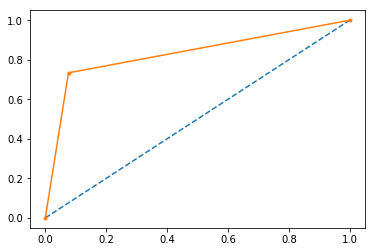

In [92]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

auc = roc_auc_score(y_test,y_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')

pyplot.show()

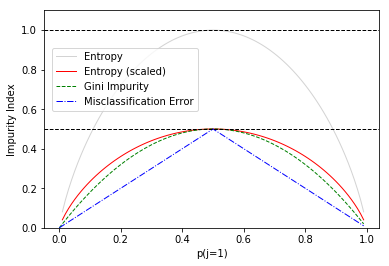

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
scaled_ent = [e*0.5 if e else None for e in ent]
c_err = [classification_error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [ent, scaled_ent, gini(x), c_err],
      ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
      ['-', '-', '--', '-.'],
      ['lightgray', 'red', 'green', 'blue']):
   line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
         ncol=1, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(j=1)')
plt.ylabel('Impurity Index')
plt.show()